In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"Copper_Set.xlsx - Result 1.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\4037692527.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"Copper_Set.xlsx - Result 1.csv")


In [3]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
data.shape

(181673, 14)

<h3>Exploratory Data Analysis</h3>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [3]:
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
data["material_ref"].value_counts()

DX51D+Z                                     922
G9010                                       856
DC01 RED.FLAT KUCHNIA EKO 2.2               777
DC01                                        725
G9006                                       671
                                           ... 
0000000000000000000000000000000003050080      1
0000000000000000000000000000000004001568      1
0000000000000000000000000000000003016460      1
0000000000000000000000000000000003016459      1
202006170005.IO.1.1                           1
Name: material_ref, Length: 16563, dtype: int64

In [4]:
data["material_ref"].nunique()

16563

In [5]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
data['material_ref'].fillna('unknown', inplace=True)

In [6]:
# deleting null values.
data = data.dropna()

In [7]:
data.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181636 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181636 non-null  object 
 1   item_date      181636 non-null  float64
 2   quantity tons  181636 non-null  object 
 3   customer       181636 non-null  float64
 4   country        181636 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181636 non-null  object 
 7   application    181636 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181636 non-null  float64
 10  material_ref   181636 non-null  object 
 11  product_ref    181636 non-null  int64  
 12  delivery date  181636 non-null  float64
 13  selling_price  181636 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 20.8+ MB


In [9]:
df=data

<h5>Changing Datatypes</h5>

In [10]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [11]:
a = data['selling_price'] <= 0
print(a.sum())
data.loc[a, 'selling_price'] = np.nan

a = data['quantity tons'] <= 0
print(a.sum())
data.loc[a, 'quantity tons'] = np.nan

a = data['thickness'] <= 0
print(a.sum())

7
4
0


<h5>SKEWNESS</h5>

In [12]:

numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical column
skewness = numerical_columns.skew()


# Display the skewness for each column
print("Skewness for each numerical column:")
print(skewness)


Skewness for each numerical column:
quantity tons    424.641723
customer        -149.088009
country            0.753574
application        0.724318
thickness        303.474955
width              0.374850
product_ref        1.014993
selling_price    301.351589
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_11220\393578713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


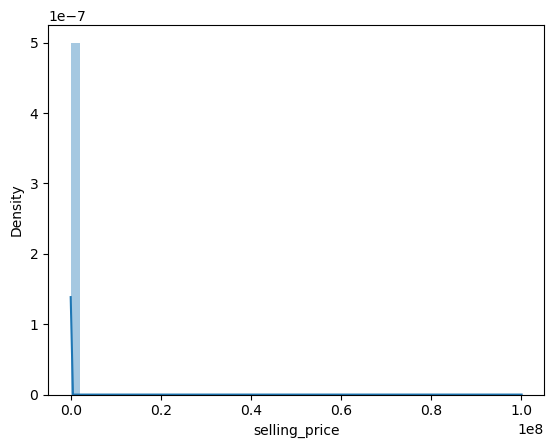

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\393578713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity tons'])


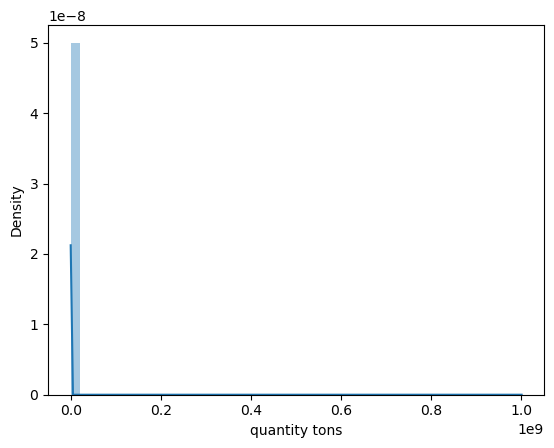

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\393578713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thickness'])


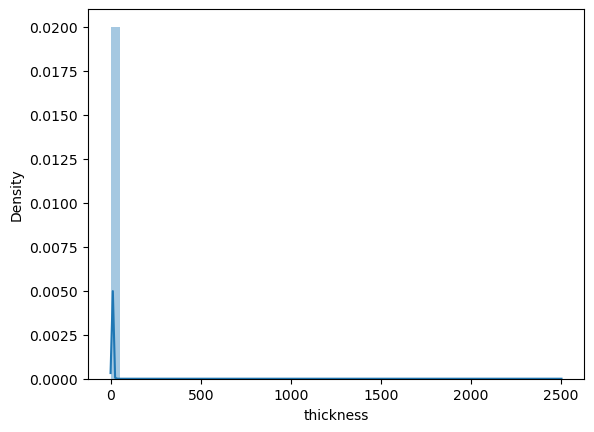

In [13]:
sns.distplot(df['selling_price'])
plt.show()
sns.distplot(df['quantity tons'])
plt.show()
sns.distplot(df['thickness'])
plt.show()

<h4>quantity tons,thickness,selling_price are right-skewed</h4>

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3153470100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price_log'])


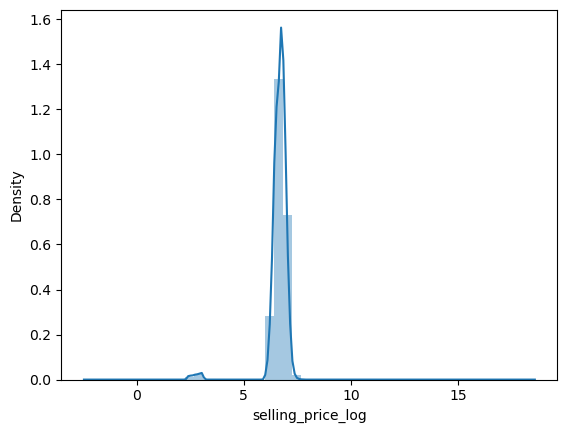

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3153470100.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity tons_log'])


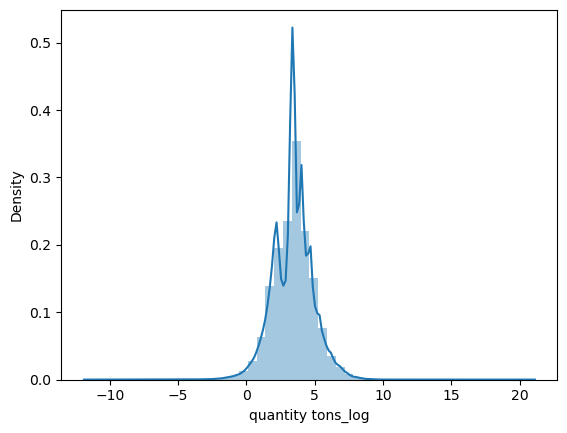

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3153470100.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thickness_log'])


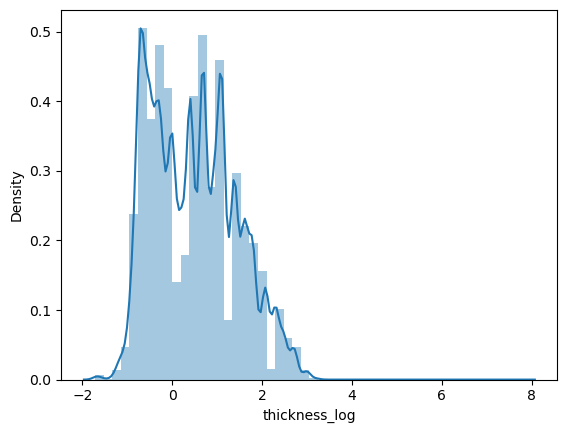

In [14]:
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()

In [15]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df['status'] = OE.fit_transform(df[['status']])
df['item type'] = OE.fit_transform(df[['item type']])

In [16]:
df.isnull().sum()

id                   0
item_date            2
quantity tons        5
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        2
selling_price        7
selling_price_log    7
quantity tons_log    5
thickness_log        0
dtype: int64

In [17]:
dfr=df.dropna()

In [18]:
dfr.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

# MODEL BUILDING

<h3>Regression Model for predicting selling price</h3>

In [19]:
#Train,Test split
X=dfr[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfr['selling_price_log']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [118]:
X_train.columns

Index(['quantity tons', 'selling_price', 'item type', 'application',
       'thickness', 'width', 'country', 'customer', 'product_ref'],
      dtype='object')

<h4>LINEAR REGRESSION</h4>

In [21]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08464529095644657
0.07805457009448069


In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

0.035162922471513175
0.8914937416429807


<h4>DECISION TREE</h4>

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

decision_tree_model = DecisionTreeRegressor(random_state=5)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#Mean Squared Error (MSE):
#It measures the average squared difference between the actual and predicted values. 
#Lower MSE values indicate better model performance.


Mean Squared Error: 0.035162922471513175
R-squared: 0.8914937416429807


In [24]:
train_score = decision_tree_model.score(X_train, y_train)
test_score = decision_tree_model.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.8914937416429807


<h4>RANDOM FOREST</h4>

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8736436626286413
0.8867180545575358


In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R-squared (R2) Score - Training: ", r2_train)
print("R-squared (R2) Score - Testing: ", r2_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (MAE) - Training: ", mae_train)
print("Mean Absolute Error (MAE) - Testing: ", mae_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error (MSE) - Training: ", mse_train)
print("Mean Squared Error (MSE) - Testing: ", mse_test)

R-squared (R2) Score - Training:  0.8736436626286413
R-squared (R2) Score - Testing:  0.8867180545575358
Mean Absolute Error (MAE) - Training:  0.16274890975269737
Mean Absolute Error (MAE) - Testing:  0.16183302202466596
Mean Squared Error (MSE) - Training:  0.039881786969380675
Mean Squared Error (MSE) - Testing:  0.036710548546510346


<h4> For Selling Price Random Forest Regression Model is perfoming better</h4>

<h3>Classification Model for predicting the Status</h3>

In [51]:
dfr.status.value_counts()

7.0    115996
1.0     34431
2.0     19566
5.0      4276
6.0      4167
0.0      3120
4.0        53
3.0        10
8.0         1
Name: status, dtype: int64

In [85]:
df=pd.read_csv(r"Copper_Set.xlsx - Result 1.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3628852134.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"Copper_Set.xlsx - Result 1.csv")


In [68]:
df.status.value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [86]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:1256: RuntimeWarning: invalid value encountered in cast
  masked_result = calc(carg[mask].astype(np.float64).astype(np.int64))
C:\Users\HP\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:1256: RuntimeWarning: invalid value encountered in cast
  masked_result = calc(carg[mask].astype(np.float64).astype(np.int64))


In [87]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
df['material_ref'].fillna('unknown', inplace=True)

In [71]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [88]:
# deleting null values.
df = df.dropna()

In [89]:
df.status.value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [90]:
dfc = df.copy()

In [91]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150435

In [92]:
dfc.status.value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [94]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
dfc['status'] = OE.fit_transform(dfc[['status']])

dfc['item type'] = OE.fit_transform(dfc[['item type']])

C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3566059303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['status'] = OE.fit_transform(dfc[['status']])
C:\Users\HP\AppData\Local\Temp\ipykernel_11220\3566059303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['item type'] = OE.fit_transform(dfc[['item type']])


In [95]:
#split data into X, y
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [96]:
#split data into train test
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [44]:
print(Y_train.value_counts())


1.0    81262
0.0    24042
Name: status, dtype: int64


<h4>Since our data is imbalanced,we use SMOTE</h4>

<h4>SMOTE</h4>

In [65]:
from imblearn.over_sampling import SMOTE

In [98]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(x_train, Y_train)

In [99]:
print(y_train.value_counts())

0.0    81262
1.0    81262
Name: status, dtype: int64


<h4>DECISION TREE</h4>

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(x_test, Y_test)
print(train_score)
print(test_score)

0.7437486155890822
0.7545367928918039


<h4>GRADIENT BOOSTING CLASSIFICATION</h4>

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(x_test, Y_test))

0.7604107701016465
0.7518778666548492


<h4>KNN</h4>

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(x_test, Y_test))

0.9343296989983018
0.8700671378874831


In [107]:
y_pred= knn.predict(x_test)

In [108]:
y_train_pred=knn.predict(X_train)

In [109]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [111]:
print("\nClassification Report on Testing Data:")
print(classification_report(Y_test, y_pred))


Classification Report on Testing Data:
              precision    recall  f1-score   support

         0.0       0.66      0.90      0.76     10389
         1.0       0.97      0.86      0.91     34742

    accuracy                           0.87     45131
   macro avg       0.81      0.88      0.84     45131
weighted avg       0.90      0.87      0.88     45131




Confusion Matrix:
[[ 9379  1010]
 [ 4854 29888]]


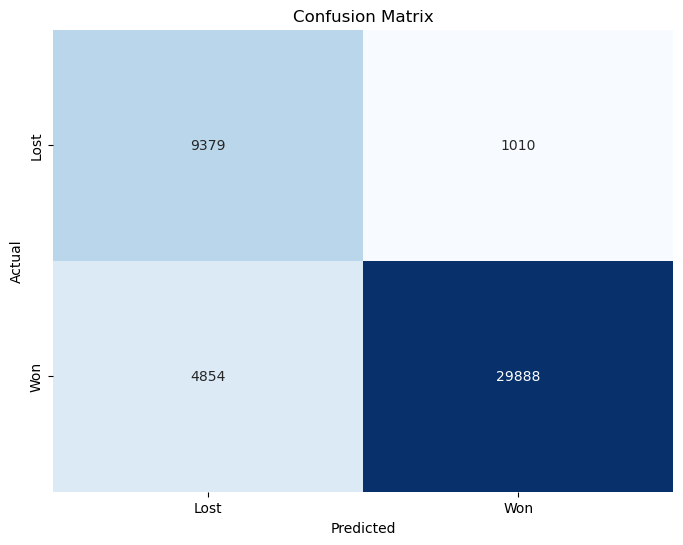

In [112]:
cm = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Heatmap for Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Lost", "Won"], yticklabels=["Lost", "Won"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [113]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(Y_test, y_pred))

Training Accuracy: 0.9343296989983018
Testing Accuracy: 0.8700671378874831


<h5>For Status prediction,KNN is good</h5>

<h3>PICKLING</h3>

In [114]:
import pickle

In [115]:
pickle.dump(knn, open('status.pkl', 'wb'))

In [116]:
pickle.dump(rf, open('price.pkl', 'wb'))